In [1]:
# Standard packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

# My functions
from utils import import_and_clean_data, select_data, current_results, bottom_party_name, top_party_votes_share, redistribute_bottom_points, simulateRankBasedElection

**Data sources**
* https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__ME__ME0201__ME0201D/Nastbastaparti190/
* https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__ME__ME0201__ME0201B/Partisympati051/

I still haven't figured out how to plug into this API properly, so I've downloaded the data as csv files. 

In [2]:
df_bp, df_nbp = import_and_clean_data()

In [3]:
# This is the first choice of voters
df_bp.head(2)

,parti,1972M11,1973M02,1973M05,1973M11,1974M05,1974M11,1975M05,1975M11,1976M02,...,2016M05,2016M11,2017M05,2017M11,2018M05,2018M11,2019M05,2019M11,2020M05,2020M11
1,M,10.6,10.8,12.8,13.0,13.2,13.3,13.6,13.9,13.5,...,24.9,23.8,19.3,22.1,22.3,20.6,17.6,18.8,20.7,22.2
2,C,25.4,27.3,26.6,26.3,24.8,23.6,23.7,22.0,20.9,...,6.0,7.3,10.1,8.6,8.7,8.5,7.3,7.3,6.9,7.3


In [4]:
# This is the second choice of voters of a certain party
df_nbp.head(2)

,partisympati,näst bästa parti,2010M11,2011M05,2011M11,2012M05,2012M11,2013M05,2013M11,2014M05,...,2016M05,2016M11,2017M05,2017M11,2018M05,2018M11,2019M05,2019M11,2020M05,2020M11
1,M,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,C,10.6,8.3,10.7,8.9,7.5,5.8,7.9,7.9,...,17.2,17.4,26.4,27.1,19.4,16.2,9.9,11.1,11.3,13.0


The data is measured twice a year. SCB has extensive data for primary party sympathies, but the second-choice preferences only stretch back as far as November 2010. So we are limited to the last 10 years of Swedish politics - after the entrance and entrenchment of the Sweden Democrats (SD). 

In [5]:
# All relevant measurement dates
dates = list(df_nbp.columns)[2:]
dates

['2010M11',
 '2011M05',
 '2011M11',
 '2012M05',
 '2012M11',
 '2013M05',
 '2013M11',
 '2014M05',
 '2014M11',
 '2015M05',
 '2015M11',
 '2016M05',
 '2016M11',
 '2017M05',
 '2017M11',
 '2018M05',
 '2018M11',
 '2019M05',
 '2019M11',
 '2020M05',
 '2020M11']

## Simulate two-choice rank-based elections for one specific date

In [6]:
df = select_data(df_bp, df_nbp, '2020M11')

In [7]:
df

,best_party,current_votes,next_best_party,redistribution_share,initial_votes,redistributed_votes
0,M,22.2,M,0.000,22.2,0
1,M,22.2,C,0.130,22.2,0
2,M,22.2,L,0.137,22.2,0
3,M,22.2,KD,0.254,22.2,0
4,M,22.2,MP,0.011,22.2,0
...,...,...,...,...,...,...
94,övriga,1.7,V,0.102,1.7,0
95,övriga,1.7,SD,0.259,1.7,0
96,övriga,1.7,övriga,0.000,1.7,0
97,övriga,1.7,inget parti,0.199,1.7,0


In [8]:
redistribute_bottom_points(df)

############################################################
Party "övriga" has been redistributed.
The highest party vote share is currently 29.9%.
############################################################


,best_party,current_votes,next_best_party,redistribution_share,initial_votes,redistributed_votes
0,M,22.2,M,0.000,22.2,0.1632
1,M,22.2,C,0.130,22.2,0.1632
2,M,22.2,L,0.137,22.2,0.1632
3,M,22.2,KD,0.254,22.2,0.1632
4,M,22.2,MP,0.011,22.2,0.1632
...,...,...,...,...,...,...
94,övriga,0.0,V,0.102,1.7,0.0000
95,övriga,0.0,SD,0.259,1.7,0.0000
96,övriga,0.0,övriga,0.000,1.7,0.0000
97,övriga,0.0,inget parti,0.199,1.7,0.0000


In [9]:
df = simulateRankBasedElection(df).round(1)

############################################################
Party "övriga" has been redistributed.
The highest party vote share is currently 29.9%.
############################################################
############################################################
Party "L" has been redistributed.
The highest party vote share is currently 30.0%.
############################################################
############################################################
Party "MP" has been redistributed.
The highest party vote share is currently 30.8%.
############################################################
############################################################
Party "KD" has been redistributed.
The highest party vote share is currently 32.2%.
############################################################
############################################################
Party "C" has been redistributed.
The highest party vote share is currently 32.5%.
#############################

In [10]:
df

,best_party,current_votes,redistributed_votes,initial_votes,diehard_votes
0,C,6.3,5.3,7.3,1.0
1,KD,10.0,9.2,5.3,0.8
2,L,5.5,5.1,3.8,0.3
3,M,15.4,12.0,22.2,3.4
4,MP,3.9,3.3,3.9,0.6
5,S,42.0,12.1,29.9,8.0
6,SD,10.8,6.4,16.8,4.3
7,V,3.8,2.1,9.2,1.7
8,övriga,1.6,1.3,1.7,0.3


## Simulate two-choice rank-based elections for all available dates

In [11]:
full_party_data = pd.DataFrame(columns=['best_party', 'current_votes', 'redistributed_votes', 'initial_votes', 'diehard_votes', 'date'])

for d in dates:
    
    # Select data with date d
    data = select_data(df_bp, df_nbp, d)
    
    # Run the rank-based election simulator
    data = simulateRankBasedElection(data).round(1)
    
    # Add the date of measurement
    data = data.assign(date=f'{d}')
    
    # Append to the full dataset
    full_party_data = full_party_data.append(data)

############################################################
Party "övriga" has been redistributed.
The highest party vote share is currently 32.2%.
############################################################
############################################################
Party "KD" has been redistributed.
The highest party vote share is currently 32.2%.
############################################################
############################################################
Party "SD" has been redistributed.
The highest party vote share is currently 33.6%.
############################################################
############################################################
Party "V" has been redistributed.
The highest party vote share is currently 34.8%.
############################################################
############################################################
Party "C" has been redistributed.
The highest party vote share is currently 34.9%.
#############################

In [12]:
full_party_data

,best_party,current_votes,redistributed_votes,initial_votes,diehard_votes,date
0,C,3.8,2.4,5.4,1.4,2010M11
1,KD,2.2,1.6,3.8,0.6,2010M11
2,L,5.1,3.7,6.9,1.4,2010M11
3,M,43.6,11.4,32.2,8.2,2010M11
4,MP,16.2,13.7,8.5,2.4,2010M11
...,...,...,...,...,...,...
4,MP,3.9,3.3,3.9,0.6,2020M11
5,S,42.0,12.1,29.9,8.0,2020M11
6,SD,10.8,6.4,16.8,4.3,2020M11
7,V,3.8,2.1,9.2,1.7,2020M11


## Create political blocs and aggregate election results based on them

In [13]:
def bloc(party):
    return {
        'V': 'S+V+MP',
        'SD': 'SD',
        'M': 'M+C+KD+L', 
        'C': 'M+C+KD+L',
        'L': 'M+C+KD+L', 
        'KD': 'M+C+KD+L',
        'S': 'S+V+MP', 
        'MP': 'S+V+MP',
        'övriga': 'övriga'
    }[party]

In [14]:
# Calculate which bloc a party belongs to, rowwise.  
full_party_data['bloc'] = full_party_data['best_party'].apply(bloc)

In [15]:
# Aggregate current_votes, redistributed_votes, initial_votes and diehard_votes on a bloc basis. 
full_bloc_data = (
    full_party_data
    .copy()
    .drop(columns=['best_party'])
    .groupby(['bloc', 'date'])
    .aggregate({'current_votes': 'sum', 'redistributed_votes': 'sum', 'initial_votes': 'sum', 'diehard_votes': 'sum'})
    .reset_index()
)
full_bloc_data

,bloc,date,current_votes,redistributed_votes,initial_votes,diehard_votes
0,M+C+KD+L,2010M11,54.7,19.1,48.3,11.6
1,M+C+KD+L,2011M05,40.7,27.8,45.5,12.8
2,M+C+KD+L,2011M11,54.6,18.6,48.6,11.9
3,M+C+KD+L,2012M05,35.6,24.2,42.3,11.7
4,M+C+KD+L,2012M11,37.1,25.7,42.6,11.4
...,...,...,...,...,...,...
79,övriga,2018M11,2.3,2.0,1.9,0.3
80,övriga,2019M05,2.3,1.7,1.9,0.5
81,övriga,2019M11,2.5,2.0,1.7,0.5
82,övriga,2020M05,1.8,1.6,1.2,0.2


## Visualise voting patterns over time

In [40]:
def visualise_elections(data, y, hue, title, ylab, leglab, palette):
    
    sns.set(rc={'figure.figsize':(20,10)})
    sns.set_style('white')
    sns.set_context("poster")

    plt.title(title, size=24)

    g = sns.lineplot(data=data, 
                 x='date', 
                 y=y, 
                 hue=hue, 
                 style=hue, 
                 markers=True,
                 dashes=False,
                 lw=2, 
                 alpha=1, 
                 palette=palette); # coolwarm

    g.axhline(50, lw=1, color='gray', ls='--')

    plt.xlabel("Survey date")
    plt.ylabel(ylab)
    plt.xticks(rotation=45);
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]);
    plt.legend(title=leglab, loc='lower left');

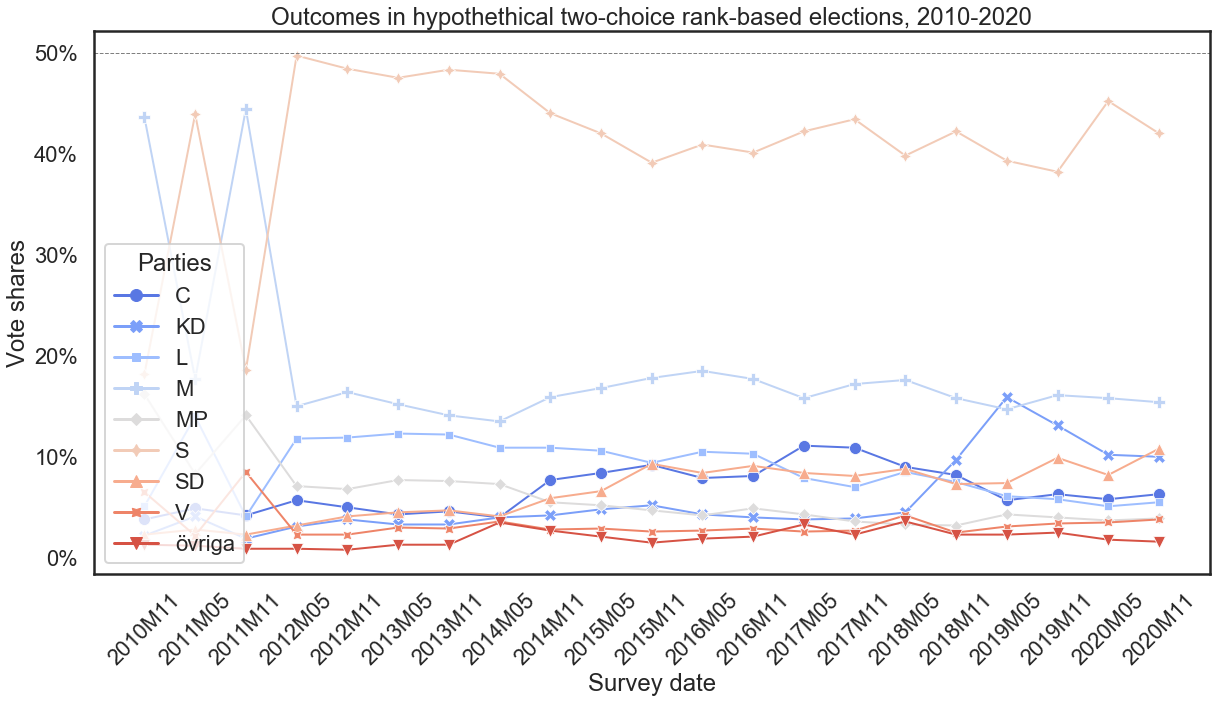

In [41]:
visualise_elections(data=full_party_data, 
                    y='current_votes', 
                    hue='best_party', 
                    title='Outcomes in hypothethical two-choice rank-based elections, 2010-2020',
                    ylab='Vote shares', 
                    leglab='Parties', 
                    palette='coolwarm')

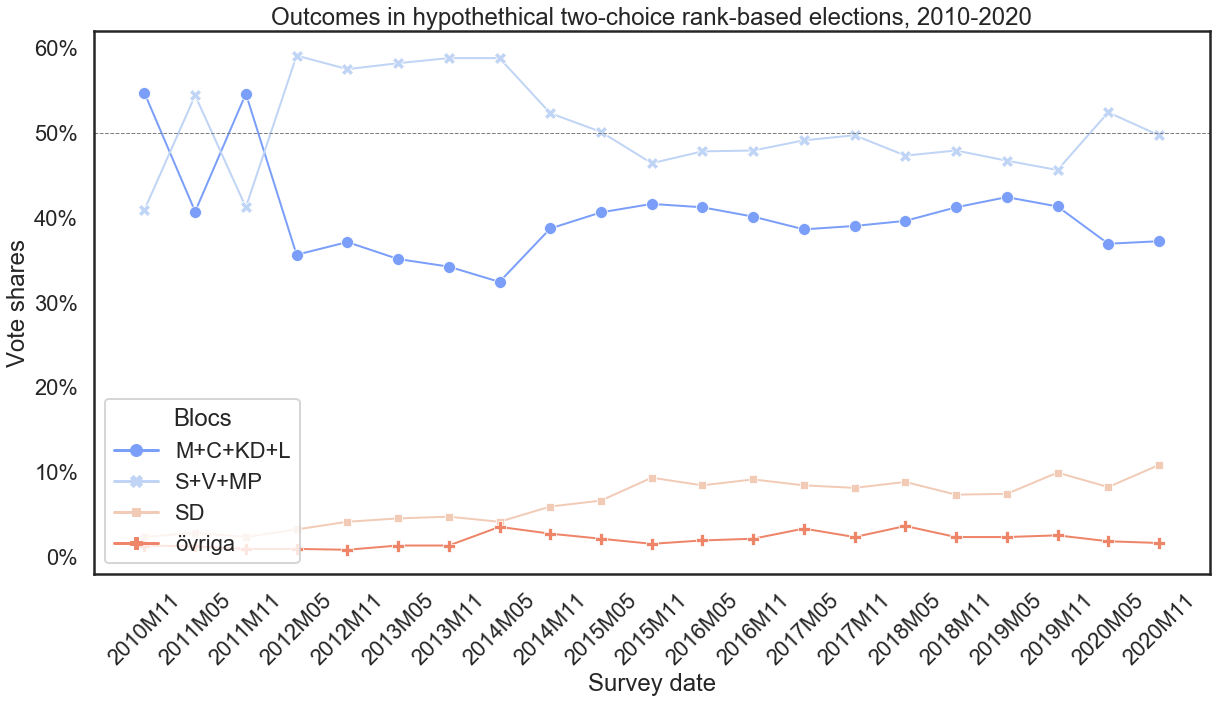

In [42]:
visualise_elections(data=full_bloc_data, 
                    y='current_votes', 
                    hue='bloc', 
                    title='Outcomes in hypothethical two-choice rank-based elections, 2010-2020',
                    ylab='Vote shares', 
                    leglab='Blocs', 
                    palette='coolwarm')

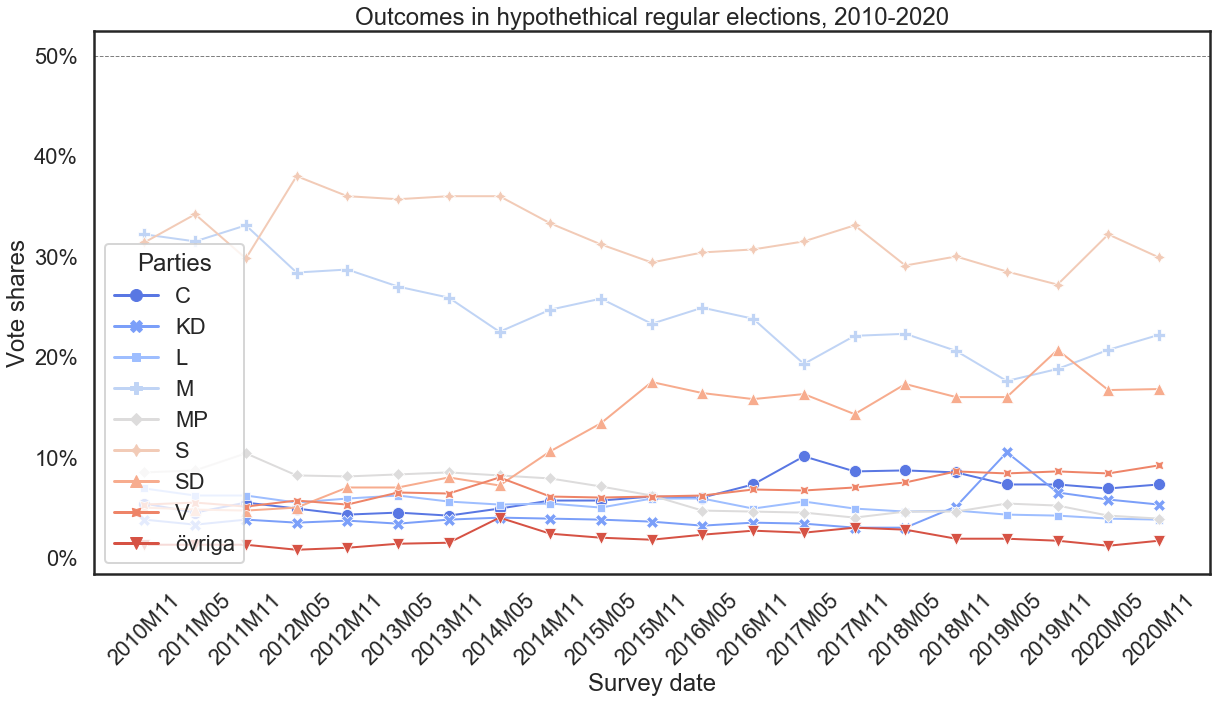

In [54]:
visualise_elections(data=full_party_data, 
                    y='initial_votes', 
                    hue='best_party', 
                    title='Outcomes in hypothethical regular elections, 2010-2020',
                    ylab='Vote shares', 
                    leglab='Parties', 
                    palette='coolwarm')

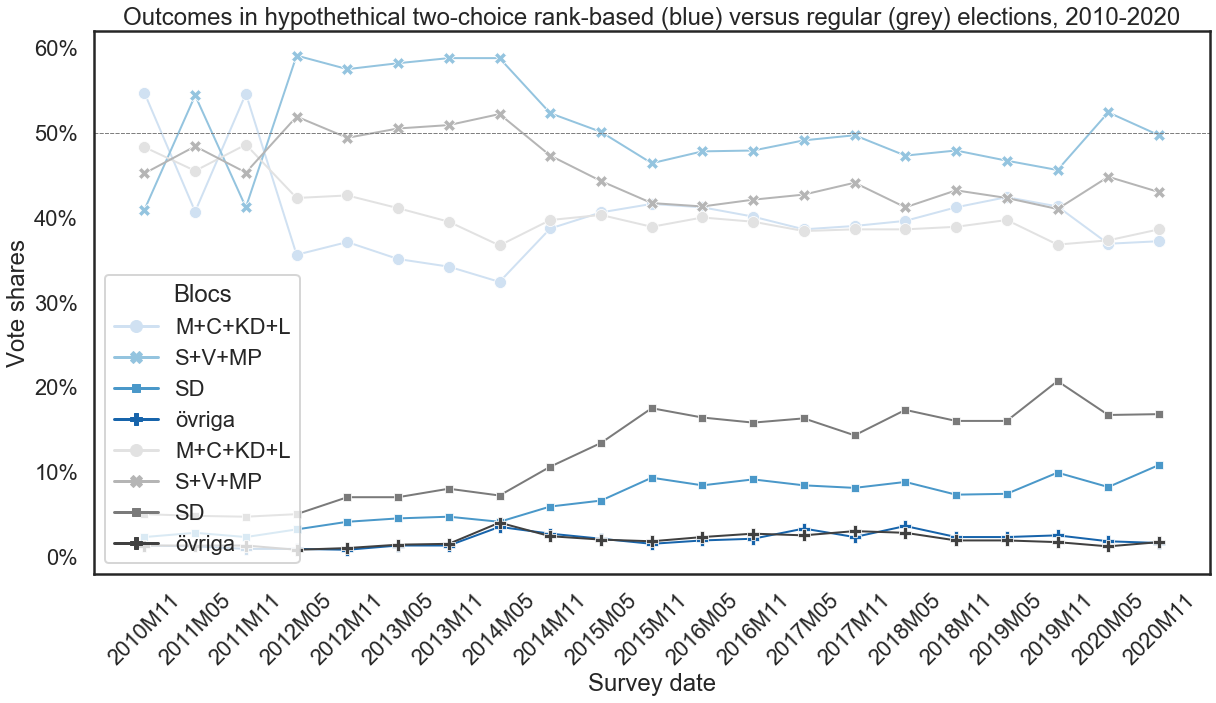

In [59]:
visualise_elections(data=full_bloc_data, 
                    y='current_votes', 
                    hue='bloc', 
                    title='Outcomes in hypothethical two-choice rank-based elections, 2010-2020',
                    ylab='Vote shares', 
                    leglab='Blocs', 
                    palette='Blues')

visualise_elections(data=full_bloc_data, 
                    y='initial_votes', 
                    hue='bloc', 
                    title='Outcomes in hypothethical two-choice rank-based (blue) versus regular (grey) elections, 2010-2020',
                    ylab='Vote shares', 
                    leglab='Blocs', 
                    palette='Greys')

In [50]:
full_party_data = full_party_data.assign(change_initial_to_current=lambda x: x['current_votes'] - x['initial_votes'])
full_bloc_data = full_bloc_data.assign(change_initial_to_current=lambda x: x['current_votes'] - x['initial_votes'])

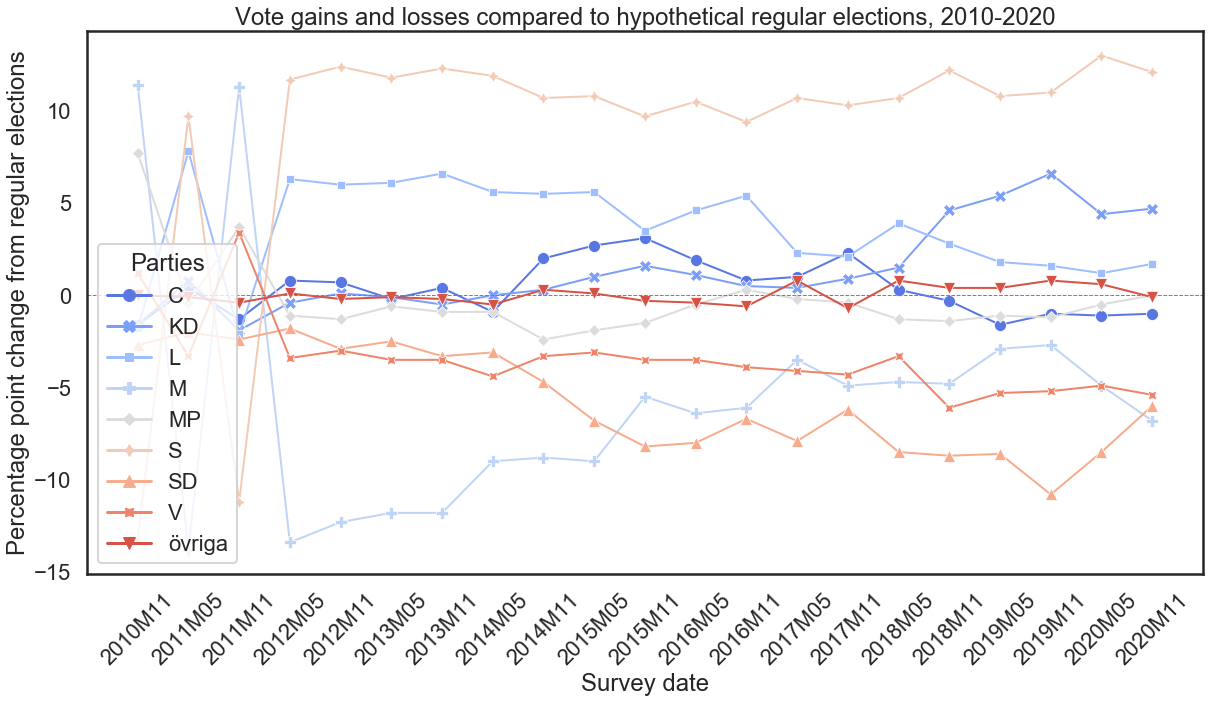

In [57]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context("poster")

plt.title("Vote gains and losses compared to hypothetical regular elections, 2010-2020", size=24)

g = sns.lineplot(data=full_party_data, 
             x="date", 
             y="change_initial_to_current", 
             hue='best_party', 
             style='best_party', 
             markers=True,
             dashes=False,
             lw=2, 
             alpha=1, 
             palette='coolwarm'); # coolwarm

g.axhline(0, lw=1, color='gray', ls='--')

plt.xlabel("Survey date")
plt.ylabel("Percentage point change from regular elections")
plt.xticks(rotation=45);
plt.legend(title='Parties', loc='lower left');

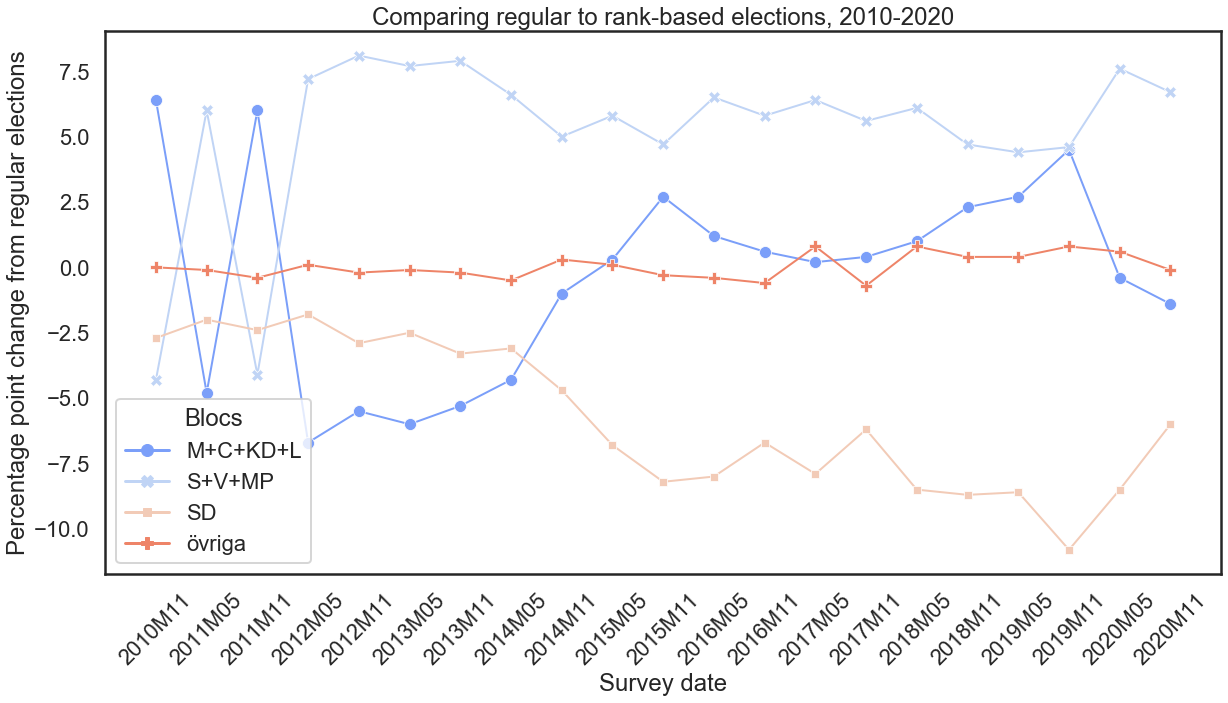

In [52]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style('white')
sns.set_context("poster")

plt.title("Comparing regular to rank-based elections, 2010-2020", size=24)

g = sns.lineplot(data=full_bloc_data, 
             x="date", 
             y="change_initial_to_current", 
             hue='bloc', 
             style='bloc', 
             markers=True,
             dashes=False,
             lw=2, 
             alpha=1, 
             palette='coolwarm'); # coolwarm

plt.xlabel("Survey date")
plt.ylabel("Percentage point change from regular elections")
plt.xticks(rotation=45);
plt.legend(title='Blocs', loc='lower left');